In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator

# 1 Préparation des données

## 1.1 Téléchargement de données

In [2]:
df = fetch_openml('mnist_784', version=1)

## 1.2 Information sur les données

### 1.

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 2.

In [4]:
print(df["data"].shape)
X = df["data"]

(70000, 784)


In [5]:
print(df["target"].shape)
y = df["target"]

(70000,)


In [6]:
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### 3.

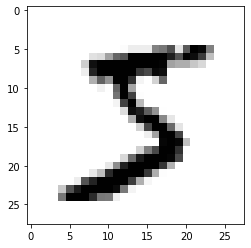

In [7]:
first_img = X[0,:].reshape(28,28)
plt.imshow(first_img, cmap=plt.cm.gray_r)

In [8]:
print(y[0])

5


### 4.

In [9]:
type(y[0])

str

### 5.

In [10]:
y = y.astype(np.uint8)
type(y)

numpy.ndarray

### 1.3 Répartition des données

In [11]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
X_train.shape, y_train.shape

((60000, 784), (60000,))

 # 2 Apprentissage d’un classifieur binaire

## 2.1 Apprentissage des données

### 1.

In [12]:
train_five = y_train == 5
test_five = y_test == 5

### 2.

In [13]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, train_five)

SGDClassifier()

## 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

## 2.2.1 Taux de classification

### 1.

In [14]:
scores = cross_val_score(sgd_model, X_train, train_five, cv=3, scoring='accuracy')
print(scores)
print(scores.mean())

[0.9704  0.9632  0.96145]
0.9650166666666666


### 2. 3.

In [15]:
class Never5Classifier(BaseEstimator):
    def fit(self, data, labels):
        pass
    def predict(self, data):
        return np.zeros((len(data), 1), dtype=bool)

### 4.

In [16]:
cls_5 = Never5Classifier()

### 5.

In [17]:
scores_cls_5 = cross_val_score(cls_5, X_train, train_five, cv=3, scoring='accuracy')
scores_cls_5

array([0.91125, 0.90855, 0.90915])

## 2.2.2 Matrice de confusion

### 1.

In [18]:
cross_pred = cross_val_predict(sgd_model, X_train, train_five, cv=3)

### 2.

In [19]:
tn, fp, fn, tp = confusion_matrix(cross_pred, train_five).ravel()
print(f'Il y a {tn} de TN (True negative)')
print(f'Il y a {fp} de FP (False positive)')
print(f'Il y a {fn} de FN (False negative)')
print(f'Il y a {tp} de TP (True positive)')

Il y a 53414 de TN (True negative)
Il y a 1135 de FP (False positive)
Il y a 1165 de FN (False negative)
Il y a 4286 de TP (True positive)


## 2.2.3 Précision et rappel:

### 1.

In [20]:
precision = precision_score(train_five, cross_pred)
print(precision)

rappel = recall_score(train_five, cross_pred)
print(rappel)

f1 = f1_score(train_five, cross_pred)
print(f1)

0.7862777472023482
0.7906290352333518
0.7884473877851362


### 2.

In [21]:
cross_pred_decision_func = cross_val_predict(sgd_model, X_train, train_five, cv=3, method='decision_function')
cross_pred_decision_func

array([   825.41604253, -17350.68209059, -25497.06664911, ...,
        13926.68184218,  -2841.31666439,  -7140.08202788])

### 3.

In [22]:
precision, recall, tresholds = precision_recall_curve(train_five, cross_pred_decision_func)

### 4.

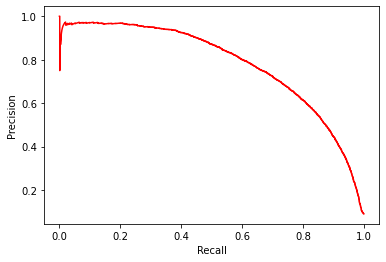

In [23]:
plt.plot(recall, precision, c='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## 2.2.4 Courbe ROC

### 1.

In [24]:
fpr, tpr, tresholds = roc_curve(train_five, cross_pred_decision_func)

### 2.

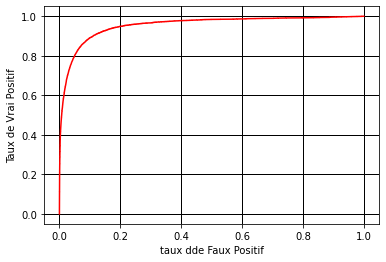

In [25]:
plt.plot(fpr, tpr, c='red')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel('taux dde Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.show()

### 3.

In [26]:
roc_score = roc_auc_score(train_five, cross_pred_decision_func)
roc_score

0.9543647747577869

# 3 Apprentissage d’un classifieur multi-classes

## 3.1 Apprentissage des données

### 1.

In [27]:
sgd_model.fit(X_train, y_train)

SGDClassifier()

### 2.

In [28]:
first_img_pred = sgd_model.predict(X[0].reshape(1, -1))
print(first_img_pred[0])

5


### 3.

In [29]:
sgd_model_decision_func = sgd_model.decision_function(X[0,:].reshape(1, -1))
sgd_model_decision_func

array([[-13443.99315413, -22108.19943306, -12178.81566129,
         -2353.69405855, -21856.75602347,   1725.91876559,
        -22604.20844575, -10469.79169678, -11097.59527651,
         -8498.34026316]])

In [30]:
sgd_model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

## 3.2.1 Taux de classification

### 1.

In [31]:
scores_all_cls = cross_val_score(sgd_model, X_train, y_train, cv=3, scoring="accuracy")
scores_all_cls

array([0.8681 , 0.88075, 0.88695])

### 2.

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 3.

In [33]:
scores_all_cls = cross_val_score(sgd_model, X_train, y_train, cv=3)
scores_all_cls

/Users/guillaumeverpoest/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/guillaumeverpoest/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.90175, 0.8888 , 0.90605])

### 3.2.2 Matrice de Confusion 

###  1.

In [34]:
cross_pred_multi = cross_val_predict(sgd_model, X_train, y_train, cv=3)
cross_pred_multi

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2.

In [35]:
conf = confusion_matrix(cross_pred_multi, y_train)
conf

array([[5578,    0,   28,   21,   12,   26,   29,   20,   16,   26],
       [   0, 6407,   26,   18,   14,   15,   16,   10,   63,   20],
       [  21,   38, 5245,  120,   48,   33,   44,   53,   47,   31],
       [   6,   23,   96, 5232,   12,  169,    3,   32,   89,   66],
       [   9,    4,   72,    2, 5196,   52,   42,   50,    3,  117],
       [  45,   43,   26,  211,   12, 4474,   96,   14,  131,   37],
       [  37,    4,   64,   26,   34,   73, 5553,    3,   24,    1],
       [   6,    7,   36,   39,   25,   16,    4, 5709,   11,  180],
       [ 220,  206,  358,  392,  327,  505,  130,  176, 5424,  378],
       [   1,   10,    7,   70,  162,   58,    1,  198,   43, 5093]])

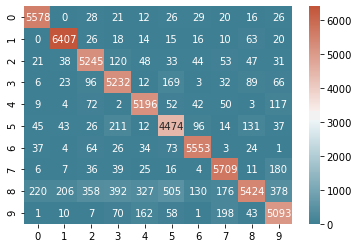

In [52]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(conf,annot=True, fmt="d", cmap=cmap)
plt.show()